In [44]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix

import requests
import numpy as np
import pandas as pd

pengUrl = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv"

#pengContent = requests.get(pengUrl).content

pengData = pd.read_csv(pengUrl, header=0)

pengData = pengData.dropna()

species = pengData['species'].values
island = pengData['island'].values
billLengthMM = pengData['bill_length_mm'].values
billDepthMM = pengData['bill_depth_mm'].values
flipperLengthMM = pengData['flipper_length_mm'].values
bodyMassG = pengData['body_mass_g'].values

mapSpec = {"Adelie":0, "Gentoo":1, "Chinstrap":2}
speciesNum = [mapSpec[s] for s in species]

#how do I also remove these from the speciesNum?
X = np.array([[bodyMassG],[billLengthMM]])
X.shape = (2, -1)
X = X.T
Y = np.array(speciesNum)



In [45]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5, max_iter=1000)
logreg.fit(X, Y)

LogisticRegression(C=100000.0, max_iter=1000)

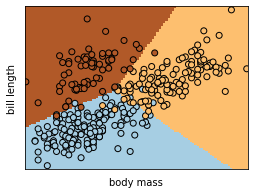

In [46]:
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="body mass",
    ylabel="bill length",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())

plt.show()

In [49]:
confusion = np.zeros((3,3))
specPred = logreg.predict(X)
for i,val in enumerate(specPred):
  confusion[Y[i],val] += 1
print(confusion)
print(confusion_matrix(Y, specPred))

[[139.   5.   2.]
 [  5. 114.   0.]
 [  2.   1.  65.]]
[[139   5   2]
 [  5 114   0]
 [  2   1  65]]
